#  Multi-Regession

In [1]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
concrete = pd.read_csv(r"D:\iiit notes\Internship\12-seasion 26-May-2021\Concrete_Data_V1.0.csv", header = 0)
concrete.head()

,Cement,Slag,Flyash,Water,SuperPlasticizer,CoarseAggregate,FineAggregate,Age,CSinMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   Slag              1030 non-null   float64
 2   Flyash            1030 non-null   float64
 3   Water             1030 non-null   float64
 4   SuperPlasticizer  1030 non-null   float64
 5   CoarseAggregate   1030 non-null   float64
 6   FineAggregate     1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   CSinMPa           1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
concrete.corr()

,Cement,Slag,Flyash,Water,SuperPlasticizer,CoarseAggregate,FineAggregate,Age,CSinMPa
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Flyash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
SuperPlasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CoarseAggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FineAggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
CSinMPa,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [5]:
IndepVar =[]

for col in concrete.columns:
    if col != 'CSinMPa':
        IndepVar.append(col)
        
TargetVar = 'CSinMPa'

x = concrete[IndepVar]
y = concrete[TargetVar]

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [7]:
from sklearn.linear_model import LinearRegression

mulreg = LinearRegression()
mulreg.fit(x_train, y_train)

LinearRegression()

In [8]:
y_pred = mulreg.predict(x_test)

In [9]:
from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test,y_pred),3))
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test,y_pred),3))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),3))
print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y_test,y_pred),2)*100, '%')
print('R2_score:', round(metrics.r2_score(y_test,y_pred),6))

Mean Absolute Error (MAE): 8.299
Mean Squared Error (MSE): 109.751
Root Mean Squared Error (RMSE): 10.476
Mean Absolute Percentage Error (MAPE): 32.0 %
R2_score: 0.594378


In [10]:
def MAPE(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred)/y_test))* 100

In [11]:
result = MAPE(y_test, y_pred)
print('Mean Asolute Percentage error:', round(result,3), '%')

Mean Asolute Percentage error: 32.187 %


In [12]:
# Calculate Adjusted R squared value

r_squared = round(metrics.r2_score(y_test, y_pred), 6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Adj R Square:  0.5912


# Decision Tree

In [13]:


# Build decision tree regression model

from sklearn.tree import DecisionTreeRegressor

dcreg = DecisionTreeRegressor(criterion = 'mae', splitter = 'best', max_depth = 3)
dcreg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mae', max_depth=3)

In [14]:
print(dcreg.get_params())

{'ccp_alpha': 0.0, 'criterion': 'mae', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [15]:
y_pred1 = dcreg.predict(x_test)

In [16]:
from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test,y_pred1),3))
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test,y_pred1),3))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test,y_pred1)),3))
print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y_test,y_pred1),2)*100, '%')
print('R2_score:', round(metrics.r2_score(y_test,y_pred1),6))

Mean Absolute Error (MAE): 8.824
Mean Squared Error (MSE): 128.312
Root Mean Squared Error (RMSE): 11.327
Mean Absolute Percentage Error (MAPE): 33.0 %
R2_score: 0.52578


In [17]:
def MAPE(y_test, y_pred1):
    y_test, y_pred1 = np.array(y_test), np.array(y_pred1)
    return np.mean(np.abs((y_test - y_pred1)/y_test))* 100

In [18]:
result = MAPE(y_test, y_pred1)
print('Mean Absolute Percentage Error (MAPE):', round(result, 3), '%')

Mean Absolute Percentage Error (MAPE): 32.772 %


In [19]:
r_squared = round(metrics.r2_score(y_test, y_pred1),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Adj R Square:  0.522064


Feature: 0, Score: 0.46942
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.10486
Feature: 4, Score: 0.05565
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.37007


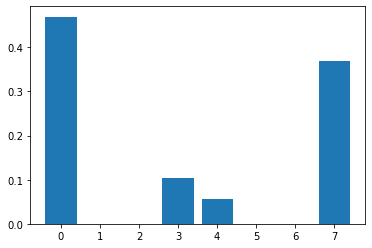

In [20]:
# Get feature importance

from matplotlib import pyplot

importance = dcreg.feature_importances_

# summarize feature importance

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [21]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   Slag              1030 non-null   float64
 2   Flyash            1030 non-null   float64
 3   Water             1030 non-null   float64
 4   SuperPlasticizer  1030 non-null   float64
 5   CoarseAggregate   1030 non-null   float64
 6   FineAggregate     1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   CSinMPa           1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
